In [1]:
import sys, os, decimal, json
sys.path.append(os.path.realpath('..'))
import json, time
import pandas as pd
import matplotlib.pyplot as plt

from TrainingPipelines.ImageClassifier.ModelBuilder import build_and_train
#from ml_botting_core.classification.universal_classifier_trainer import build_and_train

from google.cloud import storage
import os
from pathlib import Path
from dotenv import load_dotenv

env_path = Path(fr"{os.environ['USERPROFILE']}\.env")
load_dotenv(dotenv_path=env_path)

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.getenv("Eve_Online_GCP_Creds_File")

import seaborn as sns
import mplcyberpunk

plt.style.use("cyberpunk")
plt.rcParams['figure.facecolor'] = '#0d1117'
plt.rcParams['axes.facecolor'] = '#0d1117'
plt.rcParams['savefig.facecolor'] = '#0d1117'

In [2]:
def render_cm(stats, key):
    df_cm = pd.DataFrame(stats[key])
    plt.figure(figsize = (10,10))
    sns.heatmap(df_cm, annot=True, fmt=',d')

def write_rendering(file, rendering_dict):
    json_object = json.dumps(rendering_dict, indent=1)
    with open(file, "w") as outfile:
        outfile.write(json_object)    

def save_to_gcp(source_file, dest_file):
    storage_client = storage.Client()
    bucket = storage_client.get_bucket("eve_online_models") # your bucket name
    blob = bucket.blob(dest_file) 
    blob.upload_from_filename(source_file)
    #blob = bucket.blob('eve_online_models/Eve_Online_Models/test.h5') 
    #blob.upload_from_filename(r"O:\eve_models\training_data\game_state\game_state_model.h5")
    
def train(training_root, meta_file, params, save=True):
    stats, rendering = build_and_train(**params)
    print(stats['eval_results'])
    render_cm(stats, 'train_cm')
    render_cm(stats, 'val_cm')
    write_rendering(meta_file, rendering)
    print(rendering)
    if save:
        save_to_gcp(source_file=params['model_location'], dest_file=f'{params["model_name"]}/{params["model_name"]}_model.h5')
        save_to_gcp(source_file=meta_file, dest_file=f'{params["model_name"]}/{params["model_name"]}_meta.json')
    return stats, rendering

5942
Found 6077 files belonging to 4 classes.
Using 4862 files for training.
Found 6077 files belonging to 4 classes.
Using 1215 files for validation.
Class Names: ['char_select', 'connection_lost', 'in_flight', 'in_hanger']
Class Weights: {0: 1.3386563876651982, 1: 1.1110603290676417, 2: 0.48815261044176705, 3: 3.285135135135135}
Epoch 1/10
19/19 [==============================] - 51s 1s/step - loss: 0.3673 - accuracy: 0.8406 - val_loss: 0.0226 - val_accuracy: 0.9942
Epoch 2/10
19/19 [==============================] - 12s 634ms/step - loss: 0.0469 - accuracy: 0.9827 - val_loss: 0.0098 - val_accuracy: 0.9975
Epoch 3/10
19/19 [==============================] - 15s 776ms/step - loss: 0.0108 - accuracy: 0.9961 - val_loss: 0.0050 - val_accuracy: 0.9967
Epoch 4/10
19/19 [==============================] - 17s 688ms/step - loss: 0.0058 - accuracy: 0.9973 - val_loss: 0.0031 - val_accuracy: 0.9984
Epoch 5/10
19/19 [==============================] - 12s 637ms/step - loss: 0.0024 - accuracy: 0.99

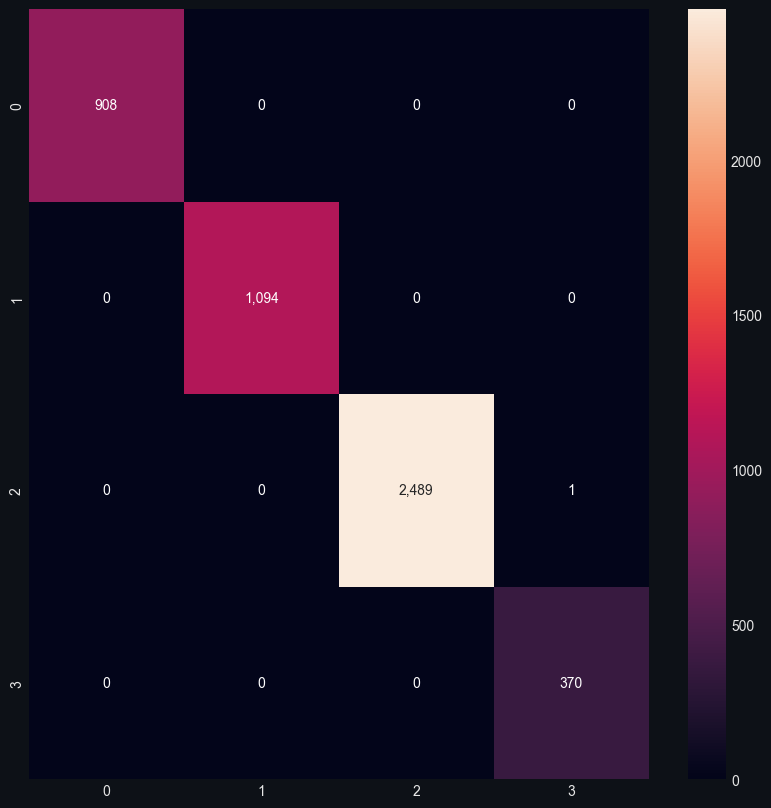

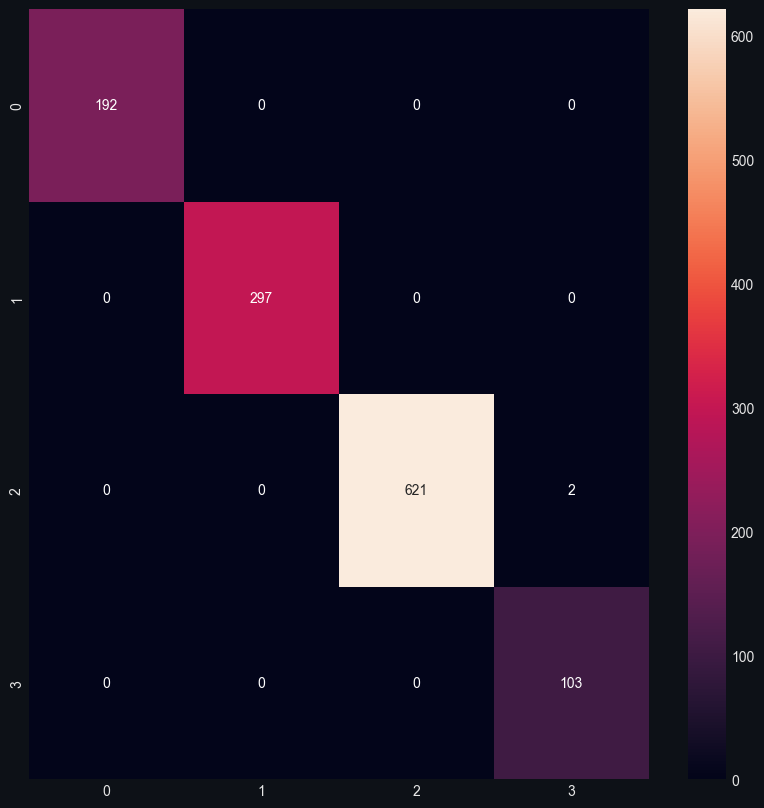

In [4]:
model_name = 'game_state_v2'
training_root = r'O:\eve_models\training_data\game_state_v2'
model_file = f'{training_root}/{model_name}_model.h5'
meta_file = f'{training_root}/{model_name}_meta.json'

params = {
    'root_image_directory': training_root,
    'model_location': model_file,
    'model_name': model_name,
    'epochs': 10,
    'auto_balance_data':True,
    'batch_size':256
}

stats, rendering = train(training_root, meta_file, params, save = True)


In [ ]:
eval_results

In [ ]:
model_name = 'mining_tool_state'
training_root = r'O:\eve_models\training_data\mining_tool_state'
model_file = f'{training_root}/{model_name}_model.h5'
meta_file = f'{training_root}/{model_name}_meta.json'

params = {
    'root_image_directory': training_root,
    'model_location': model_file,
    'model_name': model_name,
    'epochs': 10,
    'auto_balance_data':True
}

train(training_root, meta_file, params, save_to_gcp = False)

In [ ]:
model_name = 'game_state_cake_layer_1_v1'
training_root = r'O:\eve_models\training_data\game_state_cake_layer_1_v1'
model_file = f'{training_root}/{model_name}_model.h5'
meta_file = f'{training_root}/{model_name}_meta.json'

params = {
    'root_image_directory': training_root,
    'model_location': model_file,
    'model_name': model_name,
    'epochs': 10,
    'auto_balance_data':False
}

stats, rendering = build_and_train(**params)
print(stats['eval_results'])
render_cm(stats, 'train_cm')
render_cm(stats, 'val_cm')
write_rendering(meta_file, rendering)
print(rendering)

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

In [ ]:
import tensorflow as tf
train_ds = tf.keras.utils.image_dataset_from_directory(
    r'O:\eve_models\training_data\game_state_cake_layer_1_v1',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(216, 384),
    batch_size=1)

In [ ]:
model = tf.keras.models.load_model(r"O:\eve_models\training_data\game_state_cake_layer_1_v1\game_state_cake_layer_1_v1_model.h5")

In [ ]:
import numpy as np
train_data = list(train_ds)
features = np.concatenate([train_data[n][0] for n in range(0, len(train_data))])
targets = np.concatenate([train_data[n][1] for n in range(0, len(train_data))])

In [ ]:
classes = [
  "in_flight",
  "in_hanger",
  "sub_app"
 ]

In [ ]:
results = model.predict(features)

In [ ]:
for i, result in enumerate(results):
    if np.argmax(result) != targets[i]:
        print(f"Index:{i} Predicted:{classes[np.argmax(result)]} Truth:{classes[targets[i]]}")

In [ ]:
from PIL import Image
Image.fromarray(features[2581].astype('uint8'))

In [ ]:
train_ds.file_paths[2581]

In [ ]:
classes[targets[63]]

In [ ]:
model_name = 'game_state_cake_layer_2_v1'
training_root = r'O:\eve_models\training_data\game_state_cake_layer_2_v1'
model_file = f'{training_root}/{model_name}_model.h5'
meta_file = f'{training_root}/{model_name}_meta.json'

params = {
    'root_image_directory': training_root,
    'model_location': model_file,
    'model_name': model_name,
    'epochs': 10,
    'auto_balance_data':True
}

stats, rendering = build_and_train(**params)
print(stats['eval_results'])
render_cm(stats, 'train_cm')
render_cm(stats, 'val_cm')
write_rendering(meta_file, rendering)
print(rendering)

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

In [ ]:
model_name = 'game_state'
training_root = r'O:\eve_models\training_data\game_state'
model_file = f'{training_root}/{model_name}_model.h5'
meta_file = f'{training_root}/{model_name}_meta.json'

params = {
    'root_image_directory': training_root,
    'model_location': model_file,
    'model_name': model_name,
    'epochs': 10,
    'auto_balance_data':True
}

stats, rendering = build_and_train(**params)
render_cm(stats)
write_rendering(meta_file, rendering)
print(rendering)

#save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
#save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

In [ ]:
model_name = 'route_y_large_vert_class_v4'
training_root = r'O:\eve_models\training_data\route_y_large_vert_class_v4'
model_file = f'{training_root}/{model_name}_model.h5'
meta_file = f'{training_root}/{model_name}_meta.json'

params = {
    'root_image_directory': training_root,
    'model_location': model_file,
    'model_name': model_name,
    'epochs':10, 
    'resize_ratio':0.2
}

stats, rendering = build_and_train(**params)
render_cm(stats)
write_rendering(meta_file, rendering)
print(rendering)

#save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
#save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

In [ ]:

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

In [ ]:
model_name = 'set_dest'
training_root = r'O:\eve_models\training_data\set_dest'
model_file = f'{training_root}/{model_name}_model.h5'
meta_file = f'{training_root}/{model_name}_meta.json'

params = {
    'root_image_directory': training_root,
    'model_location': model_file,
    'model_name': model_name
}

stats, rendering = build_and_train(**params)
render_cm(stats)
write_rendering(meta_file, rendering)
print(rendering)

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

In [ ]:
model_name = 'hanger_menus'
training_root = r'O:\eve_models\training_data\hanger_menus'
model_file = f'{training_root}/{model_name}_model.h5'
meta_file = f'{training_root}/{model_name}_meta.json'

params = {
    'root_image_directory': training_root,
    'model_location': model_file,
    'model_name': model_name
}

stats, rendering = build_and_train(**params)
render_cm(stats)
write_rendering(meta_file, rendering)
print(rendering)

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

In [ ]:
model_name = 'nav_options'
training_root = r'O:\eve_models\training_data\nav_options'
model_file = f'{training_root}/{model_name}_model.h5'
meta_file = f'{training_root}/{model_name}_meta.json'

params = {
    'root_image_directory': training_root,
    'model_location': model_file,
    'model_name': model_name
}

stats, rendering = build_and_train(**params)
render_cm(stats)
write_rendering(meta_file, rendering)
print(rendering)

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

In [ ]:


#save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
#save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')